In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import seaborn as sns
from functions import loadDataFrame

In [28]:
# df1 = loadDataFrame('Carl/eksperiment4.csv')
# df1 = df1.iloc[:10,:]
# display(df1)

# correctsArray = np.array([])
# inputsArray = np.array([])

# for idx,row in df1.iterrows():
#     correctsArray = np.concatenate((correctsArray,row['correctSequence']),axis=0)
#     inputsArray = np.concatenate((inputsArray,row['userInput']),axis=0)

# correctsArray , inputsArray

In [29]:
names = ['Carl','Erik',
        #  'Ali'
           ]
correctsArray = np.array([])
inputsArray = np.array([])
for name in names:
    df2 = loadDataFrame(name+'/eksperiment5_finger.csv')
    # display(df2)
    for idx,row in df2.iterrows():
        correctsArray = np.concatenate((correctsArray,row['correctSequence']),axis=0)
        inputsArray = np.concatenate((inputsArray,row['userInput']),axis=0)


correctsArray , inputsArray

(array(['O', 'B', 'C', 'E', 'B', 'D', 'B', 'S', 'M', 'K', 'G', 'L', 'M',
        'A', 'C', 'K', 'Z', 'U', 'R', 'B', 'T', 'S', 'G', 'F', 'I', 'Q',
        'N', 'H', 'G', 'Y', 'M', 'K', 'W', 'I', 'V', 'C', 'D', 'B', 'D',
        'K', 'W', 'P', 'T', 'B', 'V', 'N', 'G', 'Y', 'B', 'D', 'T', 'Y',
        'J', 'U', 'G', 'F', 'C', 'R', 'J', 'A', 'A', 'G', 'L', 'D', 'U',
        'O', 'N', 'U', 'N', 'H', 'N', 'F', 'D', 'X', 'J', 'I', 'X', 'R',
        'T', 'N', 'Q', 'A', 'T', 'M', 'U', 'R', 'V', 'T', 'T', 'B', 'H',
        'E', 'I', 'T', 'P', 'J', 'Q', 'C', 'T', 'B', 'W', 'X', 'J', 'V',
        'B', 'K', 'E', 'N', 'G', 'M', 'R', 'Q', 'D', 'P', 'A', 'X', 'B',
        'Q', 'T', 'H', 'Y', 'Y', 'C', 'E', 'L', 'K', 'W', 'X', 'I', 'M',
        'L', 'K', 'J', 'S', 'L', 'C', 'A', 'F', 'F', 'D', 'L', 'H', 'A',
        'Z', 'O', 'H', 'N', 'Z', 'Z', 'U', 'E', 'E', 'P', 'P', 'I', 'Q',
        'M', 'B', 'G', 'N', 'K', 'F', 'H', 'P', 'M', 'T', 'E', 'R', 'C',
        'J', 'O', 'A', 'N', 'B', 'W', 'L', 'X', 'R'

In [30]:
correctIndexArray = []
inputIndexArray = []
for elem1, elem2 in zip(correctsArray, inputsArray):
    correctIndexArray.append(ord(elem1)-65)
    inputIndexArray.append(ord(elem2)-65)

correctIndexArray = np.array(correctIndexArray)
inputIndexArray = np.array(inputIndexArray)
correctIndexArray, inputIndexArray

(array([14,  1,  2,  4,  1,  3,  1, 18, 12, 10,  6, 11, 12,  0,  2, 10, 25,
        20, 17,  1, 19, 18,  6,  5,  8, 16, 13,  7,  6, 24, 12, 10, 22,  8,
        21,  2,  3,  1,  3, 10, 22, 15, 19,  1, 21, 13,  6, 24,  1,  3, 19,
        24,  9, 20,  6,  5,  2, 17,  9,  0,  0,  6, 11,  3, 20, 14, 13, 20,
        13,  7, 13,  5,  3, 23,  9,  8, 23, 17, 19, 13, 16,  0, 19, 12, 20,
        17, 21, 19, 19,  1,  7,  4,  8, 19, 15,  9, 16,  2, 19,  1, 22, 23,
         9, 21,  1, 10,  4, 13,  6, 12, 17, 16,  3, 15,  0, 23,  1, 16, 19,
         7, 24, 24,  2,  4, 11, 10, 22, 23,  8, 12, 11, 10,  9, 18, 11,  2,
         0,  5,  5,  3, 11,  7,  0, 25, 14,  7, 13, 25, 25, 20,  4,  4, 15,
        15,  8, 16, 12,  1,  6, 13, 10,  5,  7, 15, 12, 19,  4, 17,  2,  9,
        14,  0, 13,  1, 22, 11, 23, 17, 18, 20,  4, 10,  3, 24, 11,  3, 21,
         9,  7, 13, 25, 15, 19,  4,  0,  1, 17,  6,  2, 12, 24, 10, 15, 11,
        18, 21,  8, 16, 17, 22,  2, 23, 14, 19,  5,  0, 25, 20,  1, 10, 12,
         3, 

In [31]:
# grid = np.zeros((26,26))
# for elem1, elem2 in zip(correctIndexArray, inputIndexArray):
#     # if elem1 != elem2:
#     #     print(elem1,elem2)
#     if elem1 != elem2:
#         print(elem1,elem2)

In [32]:
max(inputIndexArray)

np.int64(25)

In [33]:
grid = np.zeros((26,26))
for elem1, elem2 in zip(correctIndexArray, inputIndexArray):
    # if elem1 != elem2:
    #     print(elem1,elem2)
    grid[elem1][elem2] += 1
grid = np.around(np.sqrt(grid),decimals=1)
# grid = (grid - grid.min()) / (grid.max() - grid.min())

grid

array([[3. , 0. , 1. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 3.6, 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 3. , 1. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 1. , 0. , 3. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 1. , 3. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 2.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 1. , 0. , 0. , 2.4, 1. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 1. , 0. , 0.

In [34]:
sum(sum(grid))

np.float64(114.90000000000003)

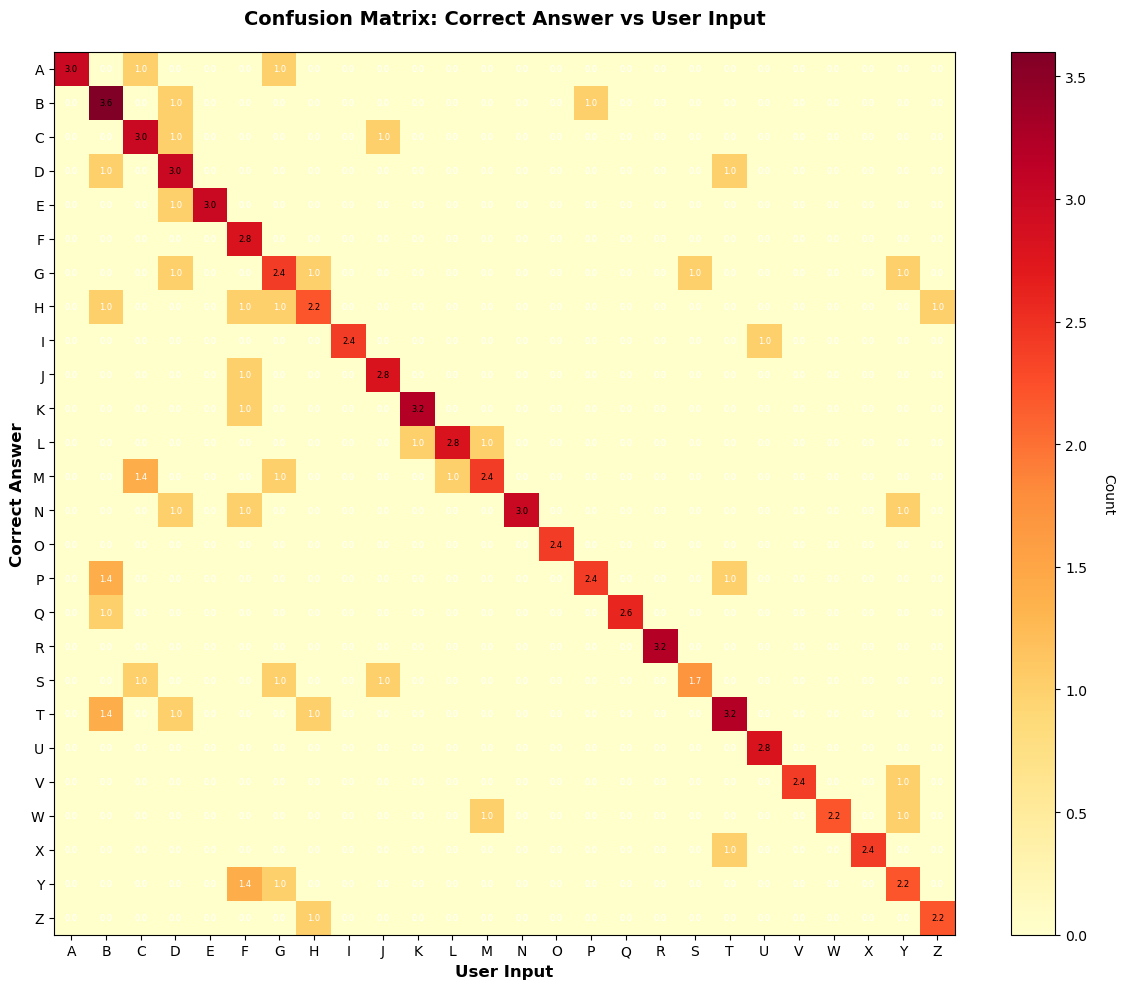

In [35]:
# Create alphabet labels
labels = [chr(i) for i in range(ord('A'), ord('Z') + 1)]

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 10))
im = ax.imshow(grid, cmap='YlOrRd', aspect='auto')

# Set ticks and labels
ax.set_xticks(np.arange(26))
ax.set_yticks(np.arange(26))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotate x-axis labels for better readability
plt.setp(ax.get_xticklabels(), rotation=0, ha="center")

# Add labels
ax.set_xlabel('User Input', fontsize=12, fontweight='bold')
ax.set_ylabel('Correct Answer', fontsize=12, fontweight='bold')
ax.set_title('Confusion Matrix: Correct Answer vs User Input', fontsize=14, fontweight='bold', pad=20)

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Count', rotation=270, labelpad=20)

# Add text annotations showing the values
for i in range(26):
    for j in range(26):
        text = ax.text(j, i, grid[i, j],
                      ha="center", va="center", color="black" if grid[i, j] > grid.max()/2 else "white",
                      fontsize=6)

plt.tight_layout()
plt.show()

In [36]:
grid[ord('R')-65][ord('R')-65]

np.float64(3.2)